# Census Income

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [9]:
data = pd.read_csv('Census_Income.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
missing_values = data.isnull().sum()
print('Missing value in each column:\n', missing_values)

Missing value in each column:
 Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


In [12]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [13]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


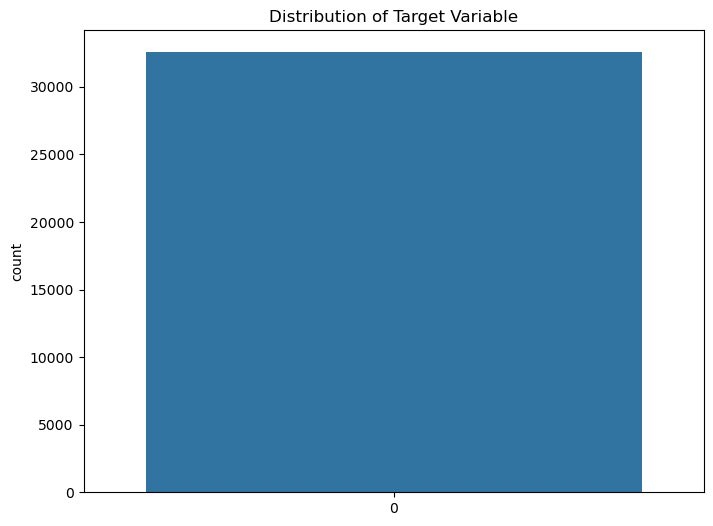

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data['Income'])
plt.title('Distribution of Target Variable')
plt.show()

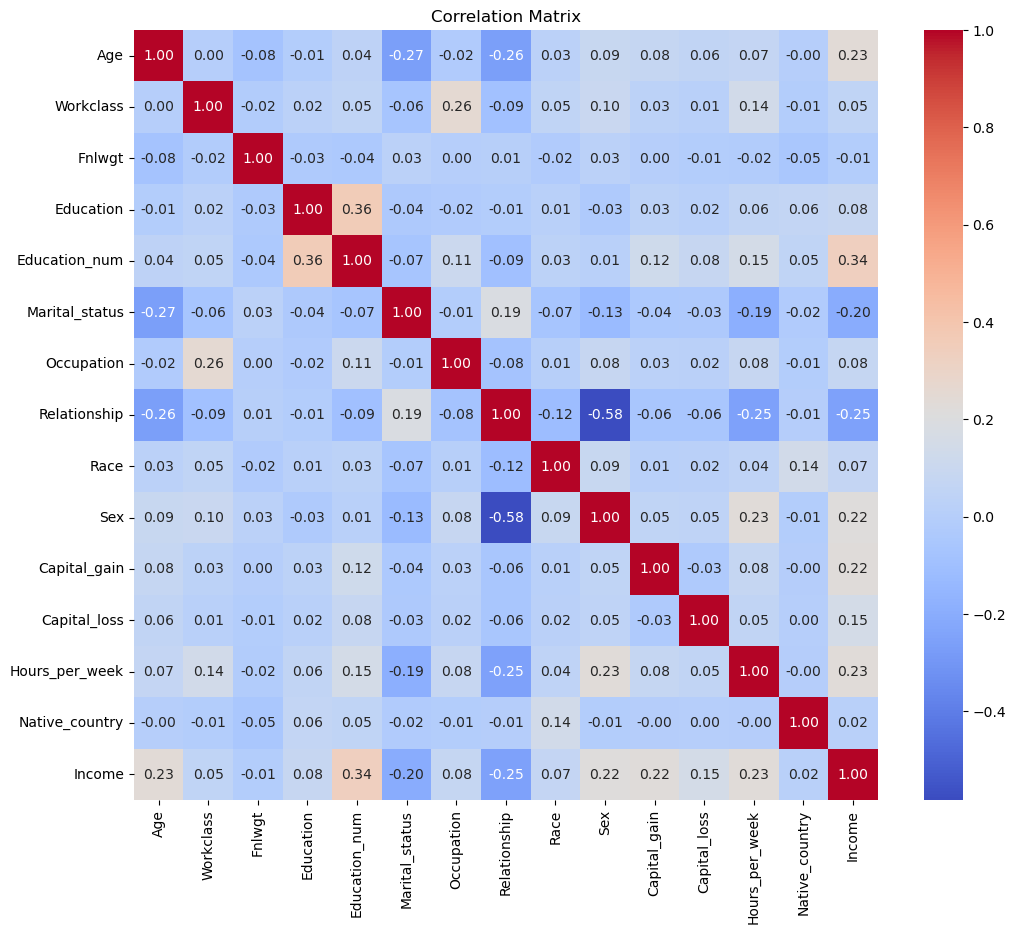

In [15]:
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
x = data.drop('Income', axis=1)
y = data['Income']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(x_test)

In [20]:
print('Classification Report;\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report;
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4912
           1       0.75      0.63      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.85      0.86      0.85      6512

Accuracy Score: 0.856418918918919
Confusion Matrix:
 [[4566  346]
 [ 589 1011]]


In [21]:
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

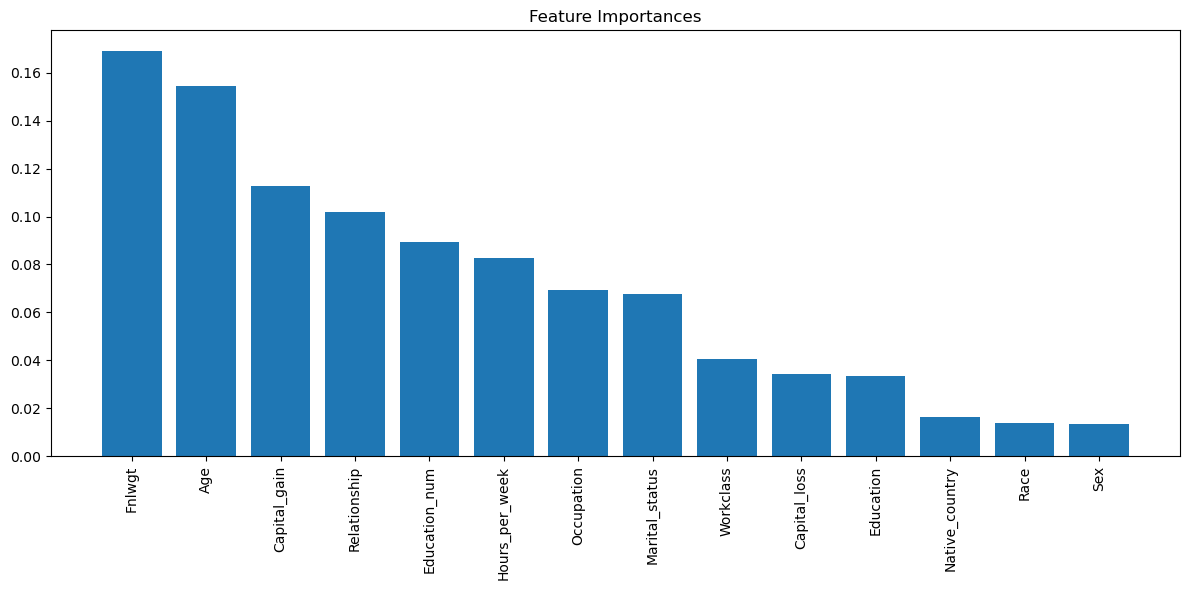

In [22]:
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(x.shape[1]), [x.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()